# 0. Importing Libraries & Data

In [6]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Scrubbing
from sklearn.impute import SimpleImputer

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Modelling Tool
from xgboost import XGBClassifier

# Testing & Validation
from sklearn.model_selection import GridSearchCV

# Misc
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

This dataset can be found at https://www.kaggle.com/competitions/spaceship-titanic 
***
#### Data Fields:
__PassengerId__ <br>
A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.<br>
__HomePlanet__ <br>
The planet the passenger departed from, typically their planet of permanent residence.<br>
__CryoSleep__ <br>
Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.<br>
__Cabin__ <br>
The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.<br>
__Destination__ <br>
The planet the passenger will be debarking to.<br>
__Age__ <br>
The age of the passenger.<br>
__VIP__ <br>
Whether the passenger has paid for special VIP service during the voyage.<br>
__RoomService, FoodCourt, ShoppingMall, Spa, VRDeck__ <br>
Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.<br>
__Name__ <br>
The first and last names of the passenger.<br>
__Transported__ <br>
Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.<br>

In [7]:
#titanic_data = pd.read_csv("/home/mmmarinov/ProjectPortfolio/1. Titanic_SpaceShip - Binary Classification/Titanic_SpaceShip_Train_Data.csv")

#titanic_data = pd.read_csv(r"C:\Users\N179960\OneDrive - Munich Re\Martin Stuff\Personal\ProjectPortfolio\1. Titanic_SpaceShip - Binary Classification\Titanic_SpaceShip_Train_Data.csv")

titanic_data = pd.read_csv(r"\\192.168.68.200\ProjectPortfolio\1. Titanic_SpaceShip - Binary Classification\Titanic_SpaceShip_Train_Data.csv")

# 1. Investigate the Data

## 1.1 High-level understanding
This segment is to get a general sense of what kind of information is held

In [8]:
titanic_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [9]:
titanic_data.info()

# Looking at what data types the dataset hold. Which needs to be changeed to float, and which whill need to be One-Hot Encoded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [10]:
titanic_data.describe(include='all')

# Viewing the mean, std, min, max for numerical values and unique for catagorical values
# Looking for an initial understanding of the spread and common values found in the dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [11]:
titanic_data.isna().sum()

# Each column has missing information. Since it's numerical and catagorical, likely I'll need to use a mix of techniques to populate the values

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Numerical: <br>
- Passenger_Id (If seperated) 
- Age (#)
- RoomService ($)
- FoodCourt ($)
- ShoppingMall ($)
- Spa ($)
- VRDeck ($)

Catagorical: <br>
- HomePlant (Unique: 3)
- Cryosleep (T/F)
- Cabin (Deck and Side)
- Destination (Unique: 3)
- VIP (T/F)
- Name (Mostly Unique)

Target Variable: <br>
- Transported (T/F)

## 1.2 Explore the Data

In [12]:
# Make a copy so that the original remains untouched
titanic_data_eda = titanic_data.copy()

In [13]:
# Breaking up Cabin to understand if there are trends with deck level or side of ship
titanic_data_eda[['Deck','Cabin_num','Side']] = titanic_data_eda['Cabin'].str.split('/', expand = True)

# Breaking up Passenger to view grouping
titanic_data_eda[['Pass_group','Pass_id']] = titanic_data_eda['PassengerId'].str.split('_', expand = True)

In [14]:
#One Hot Encoding to view correlation, it can be interesting to see if these columns have strong relation to the target variable (Transported)
titanic_data_eda_dummies = pd.get_dummies(titanic_data_eda, columns=['HomePlanet','Destination','Deck','Side'])

In [15]:
titanic_data_eda_dummies

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_num,Pass_group,Pass_id,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0001_01,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,0001,01,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,0002_01,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,0002,01,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,0003_01,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,0003,01,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1
3,0003_02,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,0003,02,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1
4,0004_01,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0004,01,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,False,A/98/P,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,98,9276,01,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
8689,9278_01,True,G/1499/S,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,1499,9278,01,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
8690,9279_01,False,G/1500/S,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1500,9279,01,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
8691,9280_01,False,E/608/S,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,608,9280,01,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [16]:
# Removing unneeded columns. This is due to the unlikelyhood of them being valuable predictors.
titanic_data_eda_dropped = titanic_data_eda_dummies.drop(['PassengerId','Cabin','Name','Cabin_num','Pass_id'],axis=1)
titanic_data_eda_dropped

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Pass_group,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,9276,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False,9278,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,9279,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,9280,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [17]:
# Changing the catagorical fields into numerical so that it can all be analyzed
titanic_data_eda_dropped[['CryoSleep','VIP','Transported','Pass_group']] = titanic_data_eda_dropped[['CryoSleep','VIP','Transported','Pass_group']].astype('float64')

In [23]:
titanic_data_eda_dropped.columns


Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'Pass_group', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
       'Side_P', 'Side_S'],
      dtype='object')

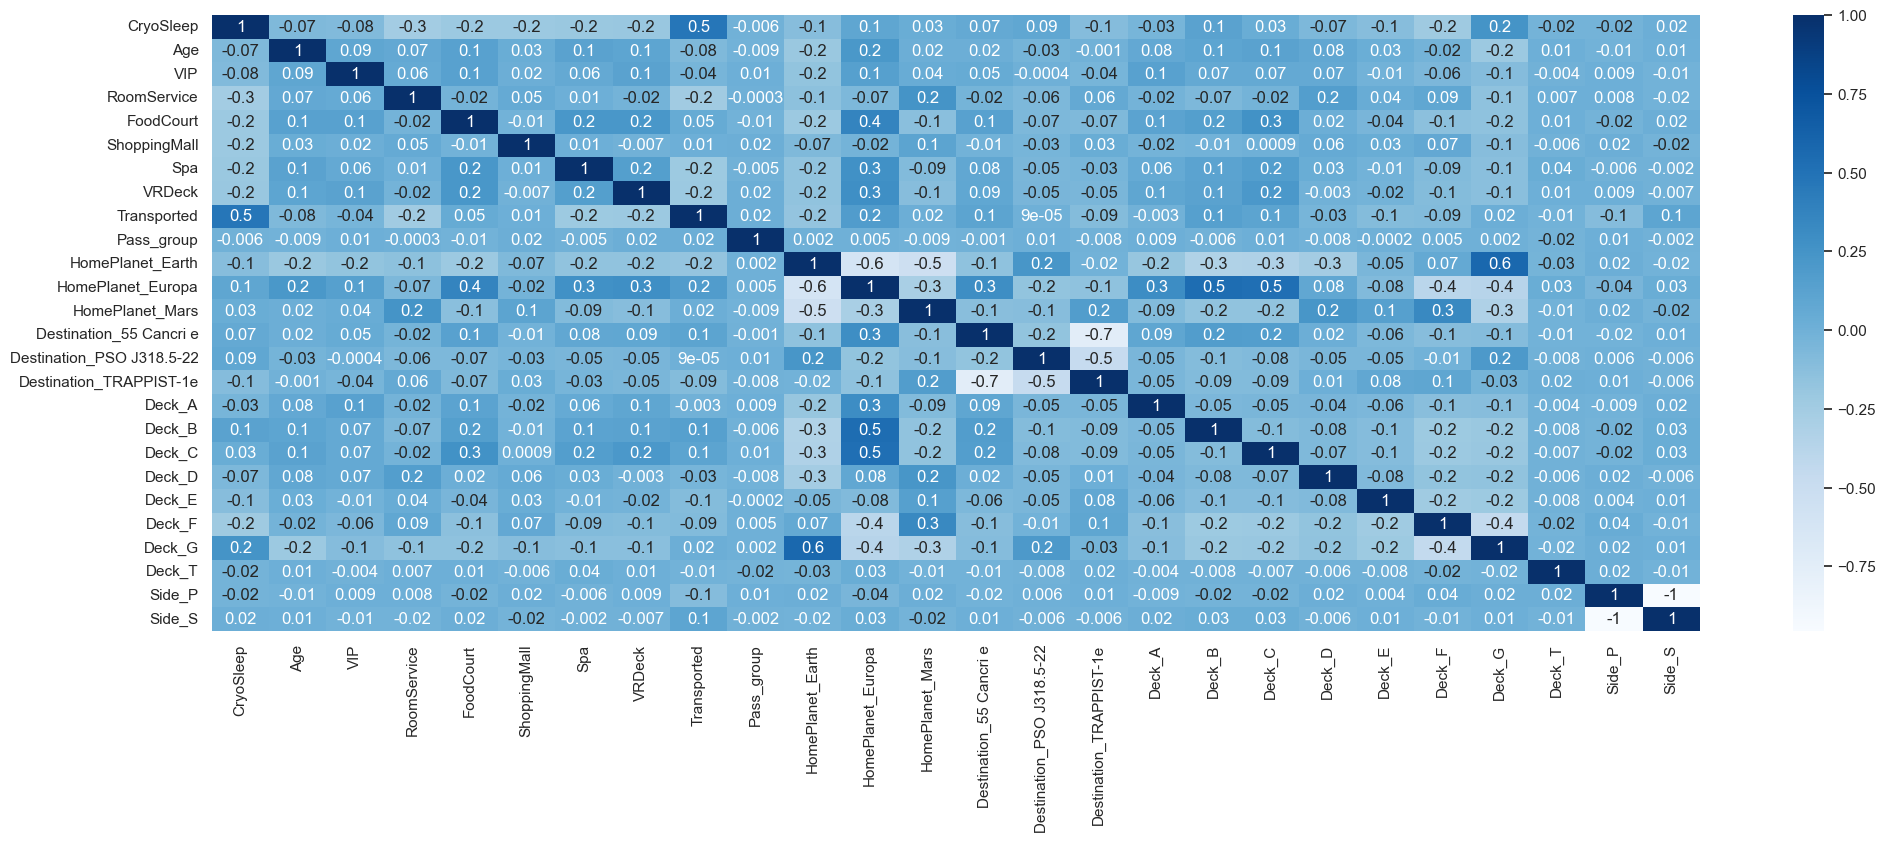

In [19]:
plt.figure(figsize=(24,8))
sns.set_theme(style="white")
corr = titanic_data_eda_dropped.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

# The interesting relation to note is Cryosleep. Which looks to be at 0.5 in relation with Transported without any data cleaning. 
# This looks like it is going to be a strong predictor and will need special attention when populating nulls.
# The next highest/lowest is +-0.2 which mainly comes from the different spend categories like RoomService or Spa/VRDeck. 
# Since their relation is negative I should see that spending more decreased the chance of being transported

TypeError: move_legend() missing 1 required positional argument: 'loc'

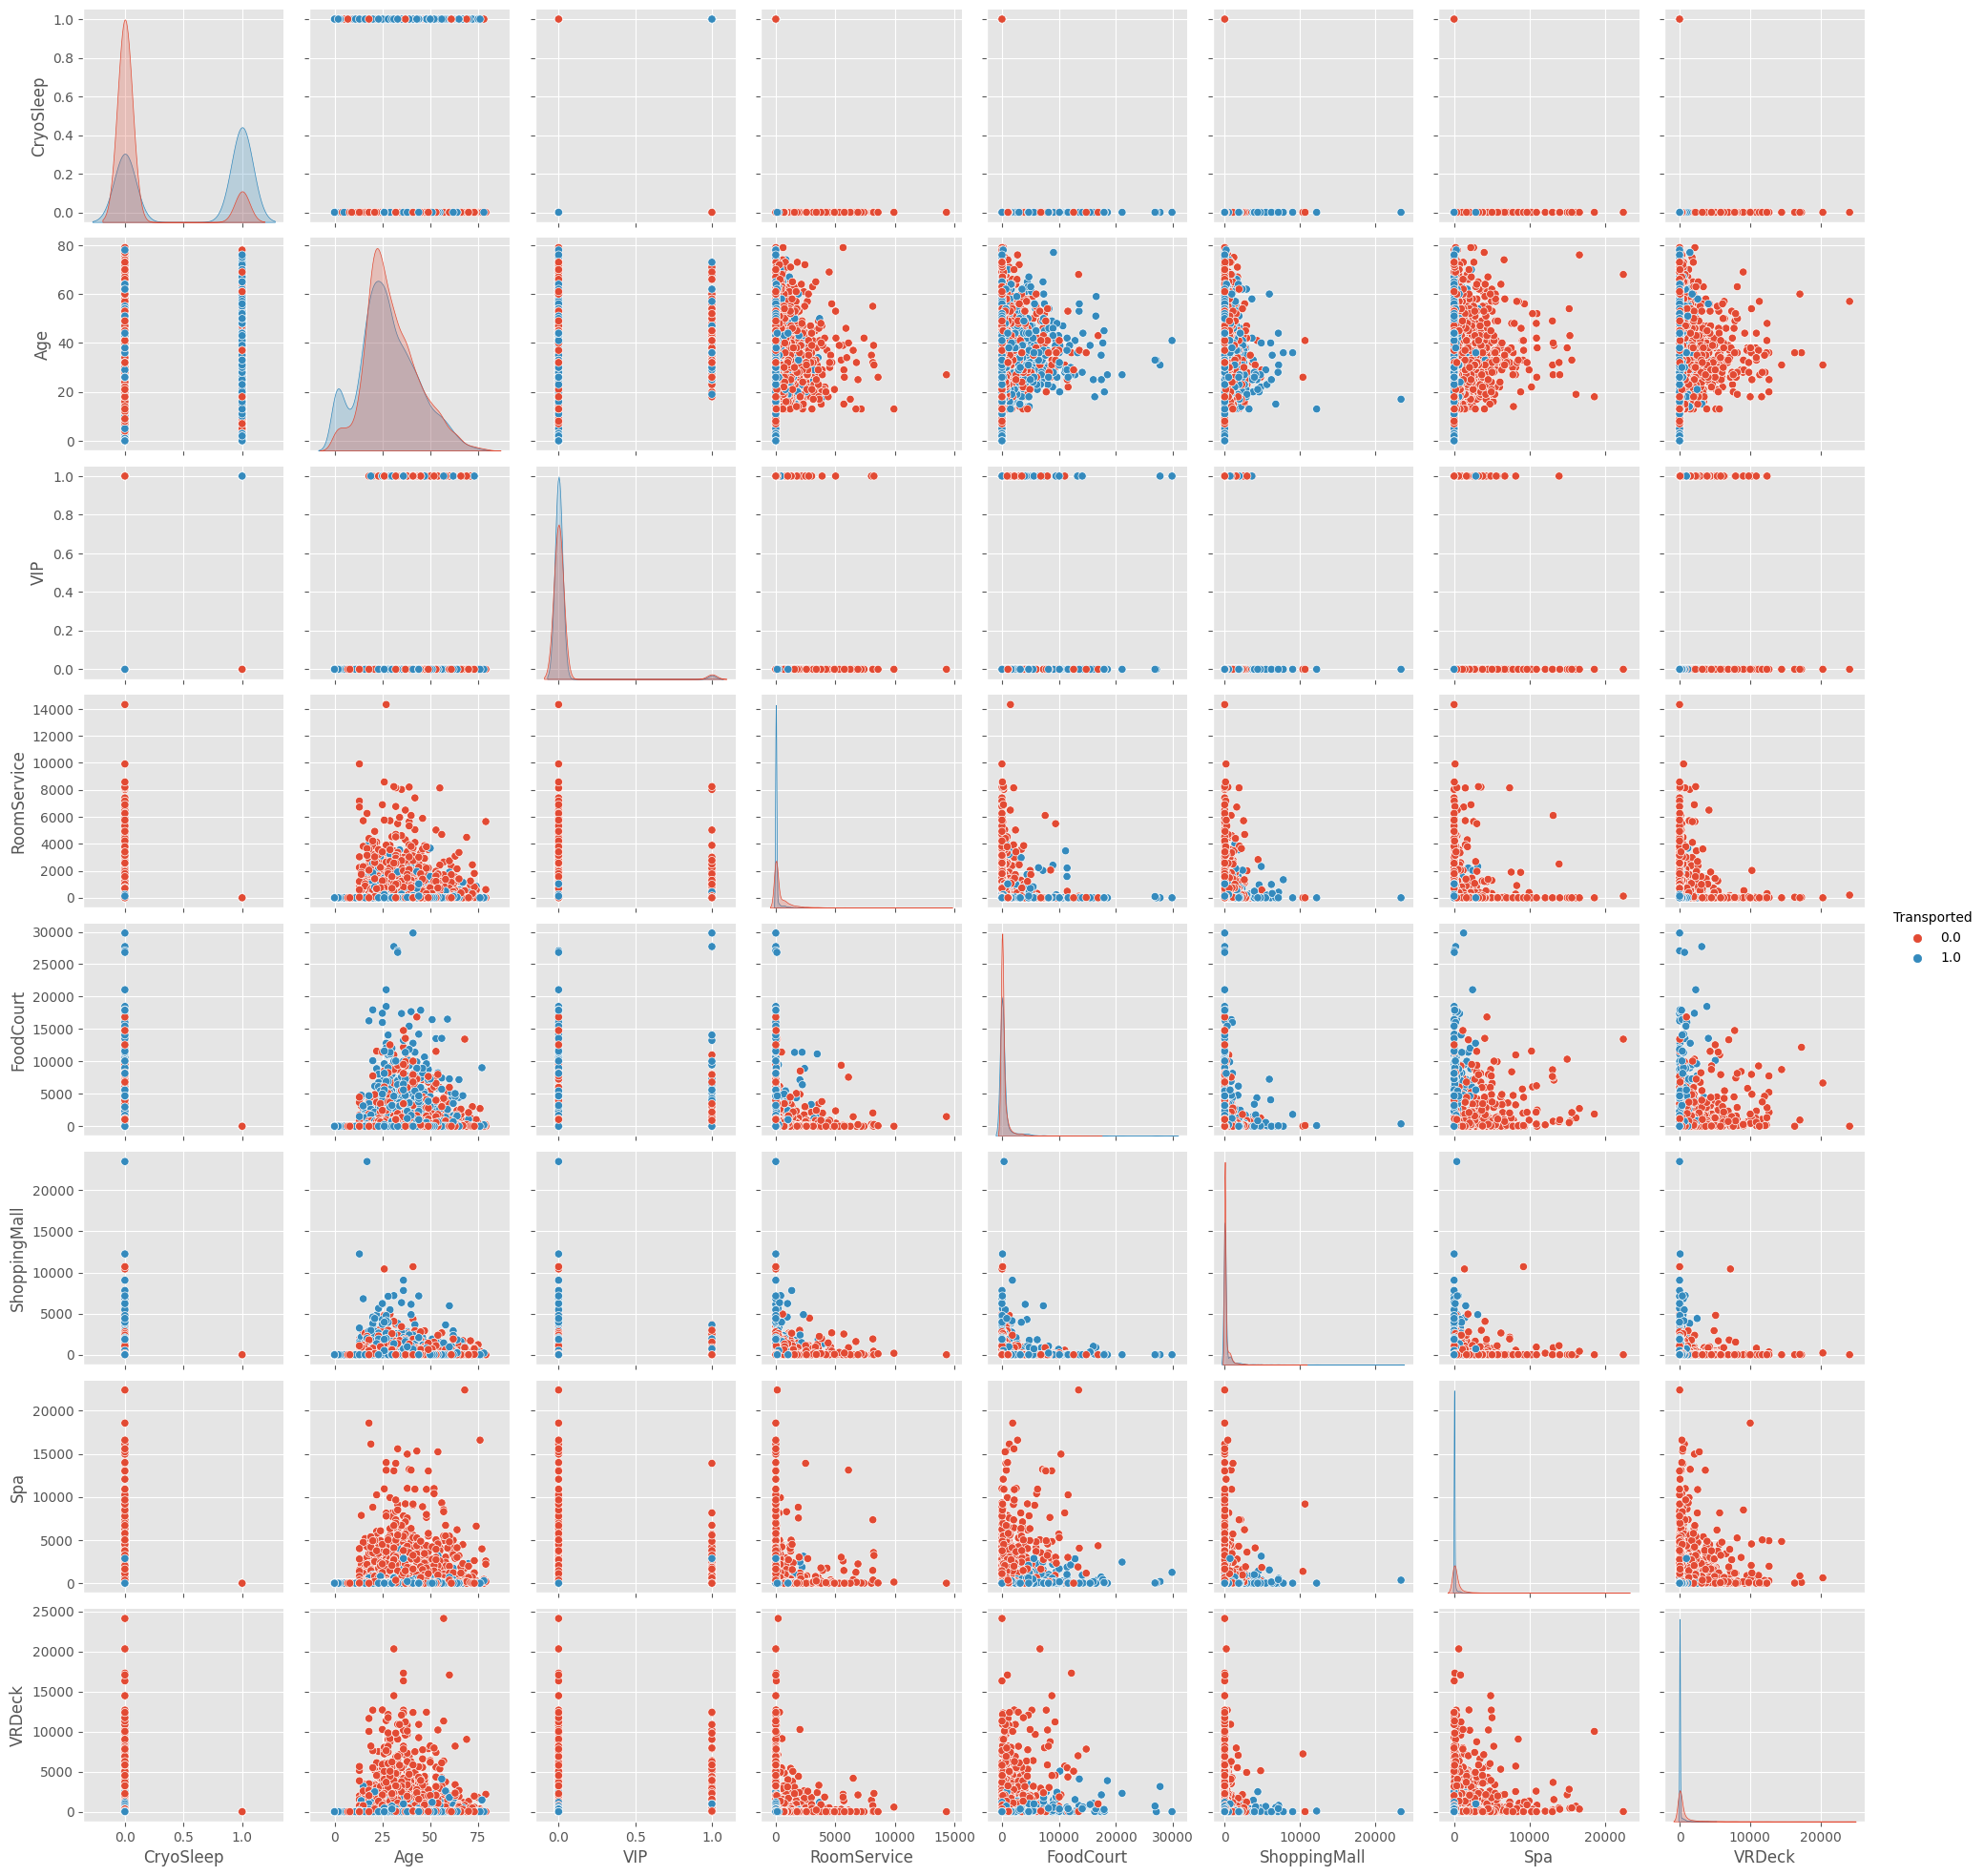

In [26]:
columns = ['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall','Spa', 'VRDeck']
sns.pairplot(titanic_data_eda_dropped, vars=columns, hue='Transported')
plt.show()


"""
Blue = Transported

Things to note:
- Someone in CryoSleep does not spend any money. I can use this to populate missing CryoSleep and the Expense columns
- The ratio of those who were transported vs not is apparent for CryoSleep and Age. Showing that these can be valuable features for prediction
- Looking at the spending, people who spent more money at the Spa/VRdeck/RoomService were less likely to be transported. While the opposite is true for Foodcourt and Shopping Mall
    - This ties back to the heatmap and provides a better look into the spread of the data points
- There is an age minmium to be a VIP. This can be used to fill in null values for Age or vise versa. We know that a 5 year old can not be a VIP
- There is an Age minimum to spending money as well. If VIP is null or False, then we can use moeny spent as a group to identify the mean value to fill in.
"""

In [31]:
# This proves my first obeservation with the relation to CryoSleep & Expenses
titanic_data_eda_dropped[['CryoSleep','RoomService','FoodCourt','Spa','ShoppingMall','VRDeck']].groupby('CryoSleep').sum()

,RoomService,FoodCourt,Spa,ShoppingMall,VRDeck
CryoSleep,,,,,
0.0,1865582.0,3799600.0,2588931.0,1443579.0,2530810.0
1.0,0.0,0.0,0.0,0.0,0.0


In [61]:
# The youngest VIP is 18 Year Old
titanic_data_eda_dropped[['VIP','Age']].groupby('VIP').min()

,Age
VIP,
0.0,0.0
1.0,18.0


In [66]:
# The youngest to spend any money is 13 Years Old
titanic_data_eda_dropped[['RoomService','FoodCourt','Spa','ShoppingMall','VRDeck','Age']]\
    .groupby('Age')\
    .sum()\
    .head(20)

,RoomService,FoodCourt,Spa,ShoppingMall,VRDeck
Age,,,,,
0.0,0.0,0.0,0.0,0.0,0.0
1.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0
6.0,0.0,0.0,0.0,0.0,0.0
7.0,0.0,0.0,0.0,0.0,0.0
8.0,0.0,0.0,0.0,0.0,0.0


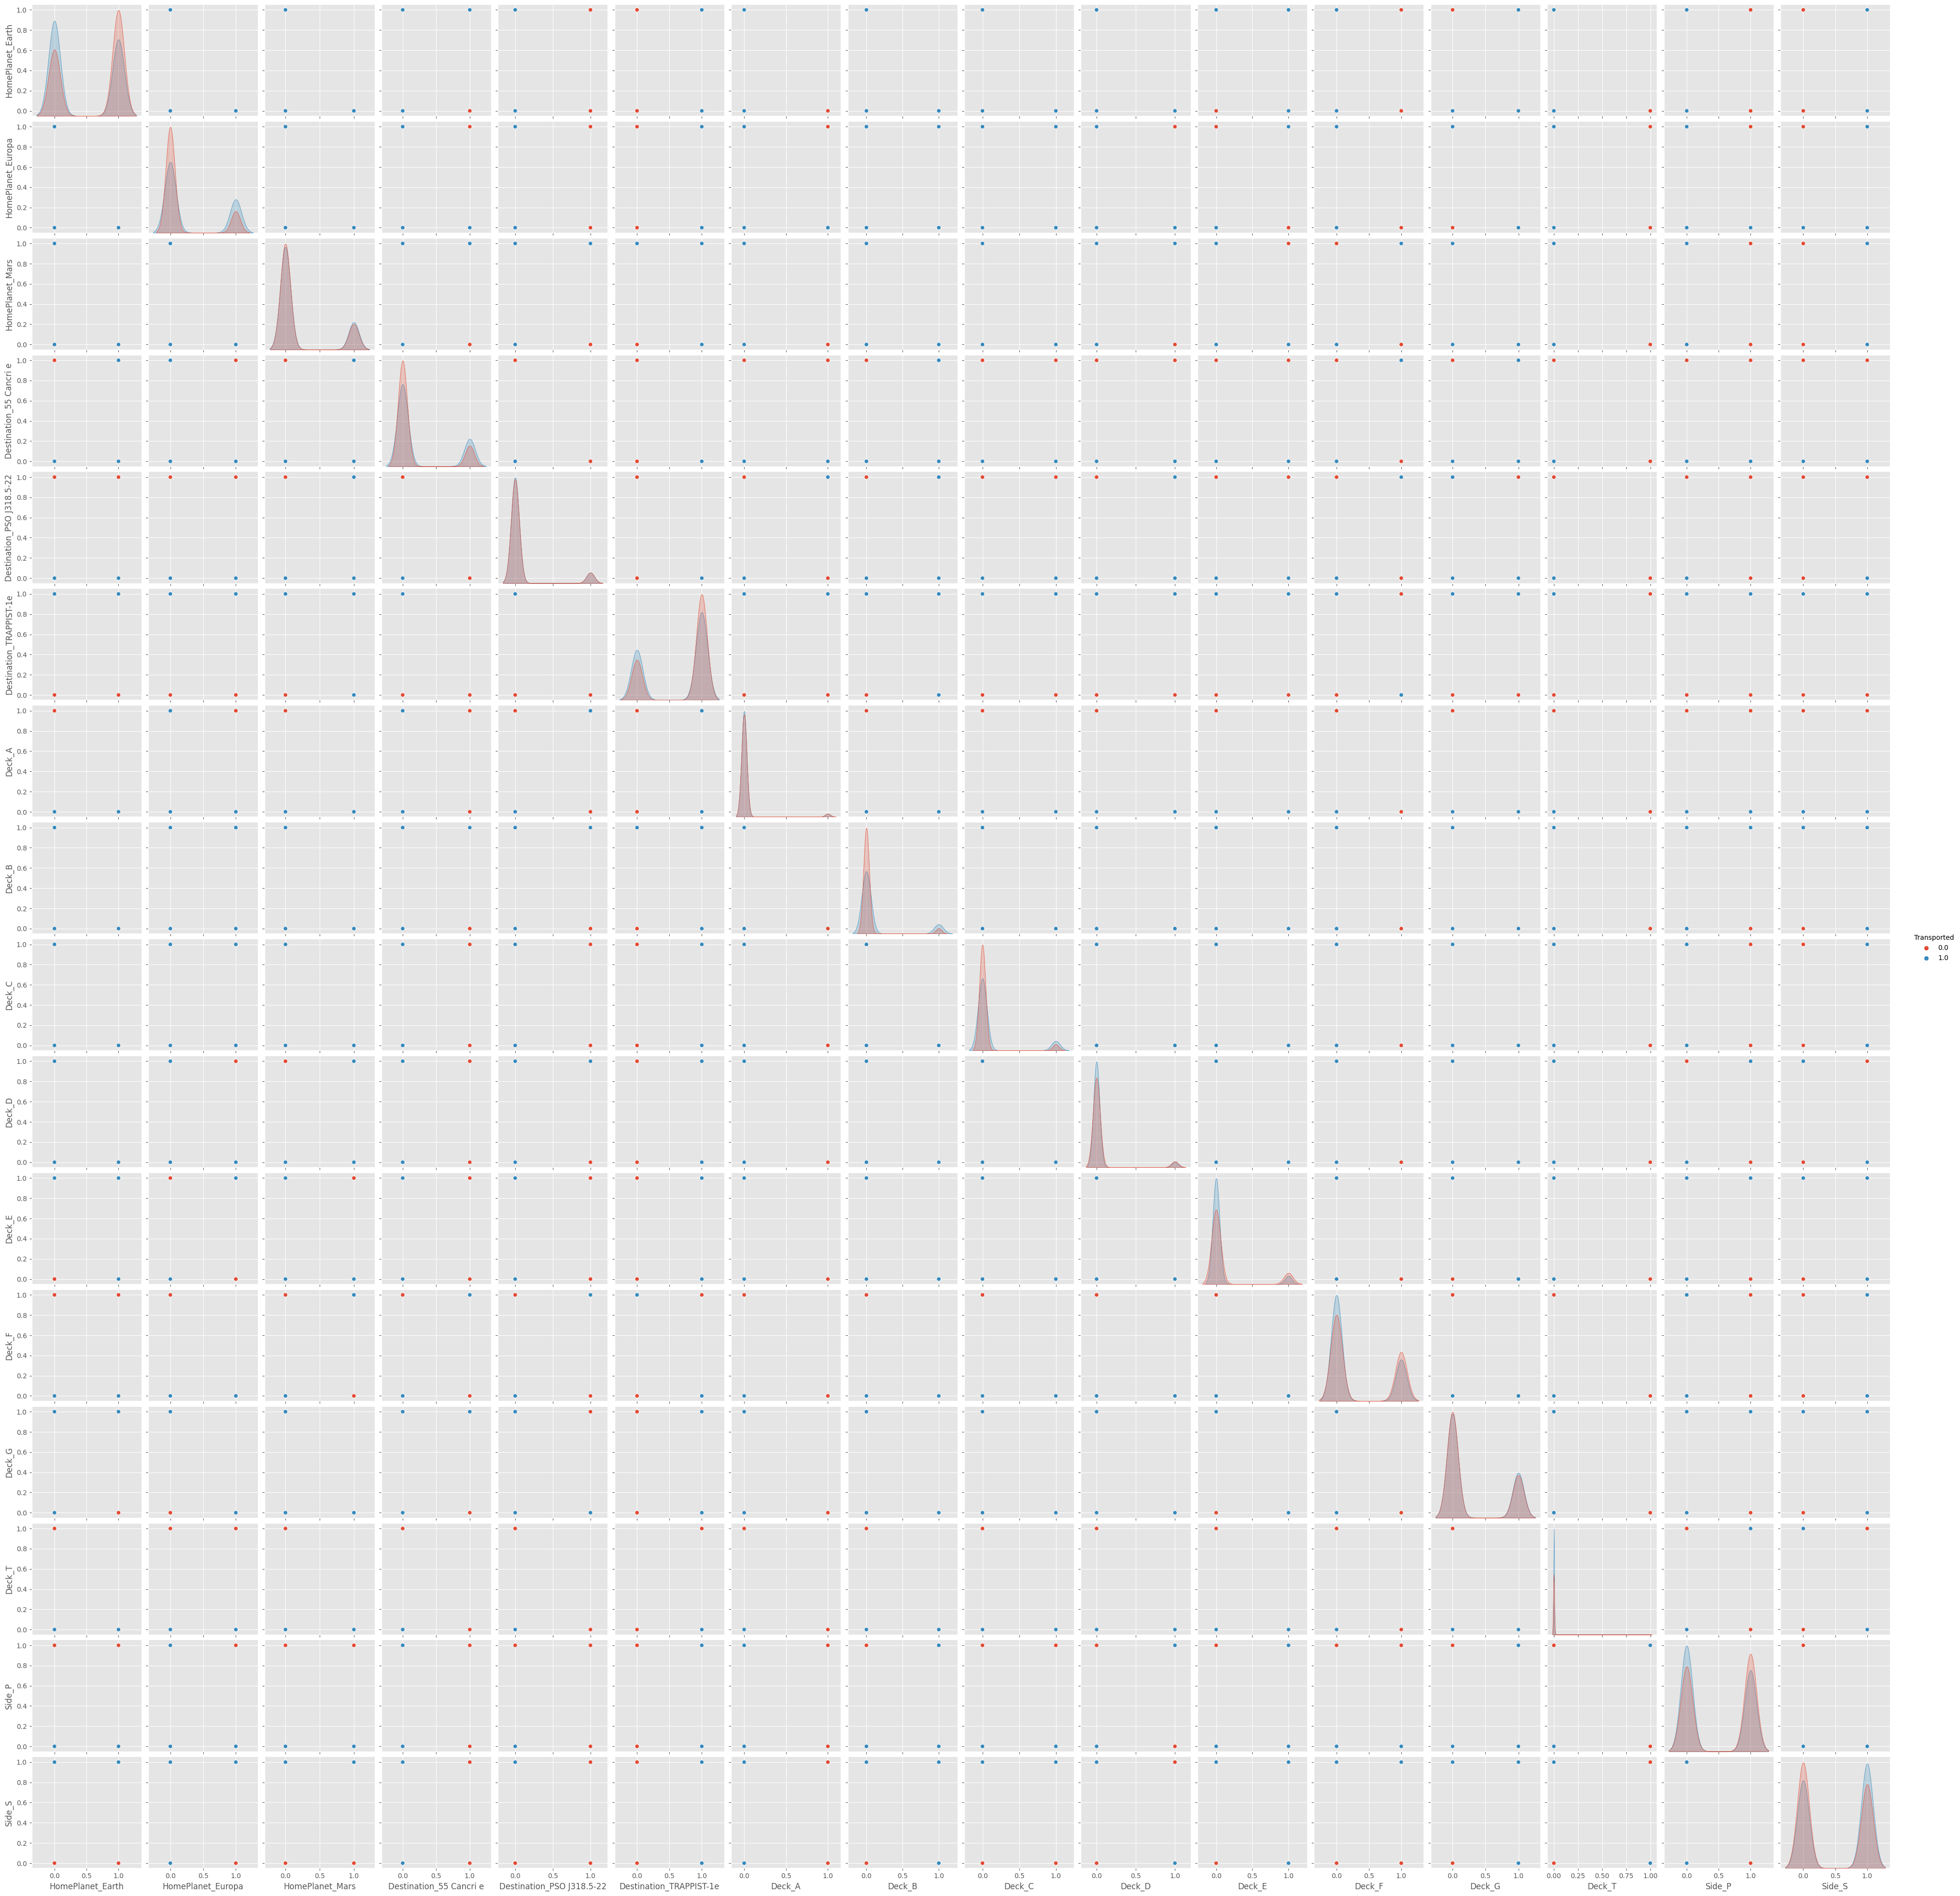

In [27]:
columns = ['HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
       'Side_P', 'Side_S']
sns.pairplot(titanic_data_eda_dropped, vars=columns, hue='Transported')
plt.show()

"""
Blue = Transported

Things to note:
- HomePlanet has some ability to predict the target variable, while Mars is insignificant. This ties back well to the heatmap. 
- Deck Side as expected is redudent. Keeping 1 would be fine. 
- Deck Level and Destination do not show much valuable information. It would be best to test whether the model fits better with or without this information.
"""

In [94]:
pass_group_counts = titanic_data_eda_dropped['Pass_group'].value_counts()
pass_group_counts_greater_than_one = pass_group_counts[pass_group_counts > 1]
pass_group_counts_greater_than_one

4498.0    8
8168.0    8
8728.0    8
8796.0    8
8956.0    8
4256.0    8
984.0     8
9081.0    8
8988.0    8
5756.0    8
5885.0    8
4005.0    8
5133.0    8
4176.0    7
1211.0    7
714.0     7
6363.0    7
6787.0    7
8770.0    7
4172.0    7
Name: Pass_group, dtype: int64

In [105]:
#Check to see if I can use the passenger group to fill in null values
titanic_data_eda_dropped[(titanic_data_eda_dropped['Pass_group']==8728)]

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Pass_group,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
8162,NaN,32.0,0.0,258.0,500.0,3.0,15.0,128.0,1.0,8728.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
8163,0.0,55.0,0.0,694.0,0.0,1.0,87.0,0.0,0.0,8728.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
8164,0.0,23.0,0.0,1254.0,0.0,45.0,0.0,0.0,0.0,8728.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
8165,0.0,38.0,0.0,647.0,23.0,1.0,0.0,0.0,0.0,8728.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
8166,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8728.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
8167,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8728.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
8168,0.0,44.0,0.0,266.0,3.0,2.0,0.0,748.0,0.0,8728.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8169,0.0,62.0,0.0,0.0,592.0,164.0,0.0,0.0,1.0,8728.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0


# 1.3 Clean the data

In [28]:
# Copying the data once more to start fresh and seperate out the eda
titanic_data_clean = titanic_data.copy()

What fields to use: <br>
>PassengerId  | Exclude  <br>
HomePlanet   | Exclude Mars  <br>
CryoSleep    | Include  <br>
Cabin        | T/E Deck, Keep 1 Side  <br> 
Destination  | Trial/Error  <br>
Age          | Include  <br>
VIP          | Include  <br>
RoomService  | Include  <br>
FoodCourt    | Include  <br>
ShoppingMall | Include  <br>
Spa          | Include  <br>
VRDeck       | Include  <br>
Name         | Exclude  <br>

What I know regarding populating missing values
- Those who are in CryoSleep could not have spent any money, therefore if CryoSleep = True then the null expenses values are 0
    - If Cryosleep is null, then sum the expenses and if it is 0 then set the value to True
    - If Cryosleep is True and an expense is null, then likely taking the mean of that column will be sufficent
- If Age is null, then I can use VIP and whether they spent money or not as a way to identify.
    - People under the age of 18 look like they can't be VIP based on the PairPlot. So if a null Age is VIP then we can use the mean of the VIP group to fill in the null value. 
    - Same goes for money spent. If there is any money spent, then we know they are at least 13 years or older meaning we can derive the mean age from that group. 
- I can use the passenger group to fill in missing home planet or Deck Side values since the group 